# First Post ( Comparing the starting grid 2024 vs 2025 )

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # for visualization
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
from matplotlib.ticker import FuncFormatter
%pip install squarify
import squarify
#print("Squarify installed successfully!")




# Path to the uploaded file
#file_path = "F1 2024 standings(AutoRecovered).xlsx"

# Load the Excel file and check available sheets
#xls = pd.ExcelFile(file_path)
#xls.sheet_names

Note: you may need to restart the kernel to use updated packages.


In [6]:

# Load the relevant sheets
gp_results_df = pd.read_excel(xls, sheet_name="GRAND PRIX RESULTS FOR PYTHON")
starting_grid_df = pd.read_excel(xls, sheet_name="STARTING GRID FOR PYTHON")

# Display the first few rows of each sheet
gp_results_df.head(), starting_grid_df.head()

NameError: name 'xls' is not defined

## Australian Grand Prix – Qualifying Analysis: 2024 vs 2025

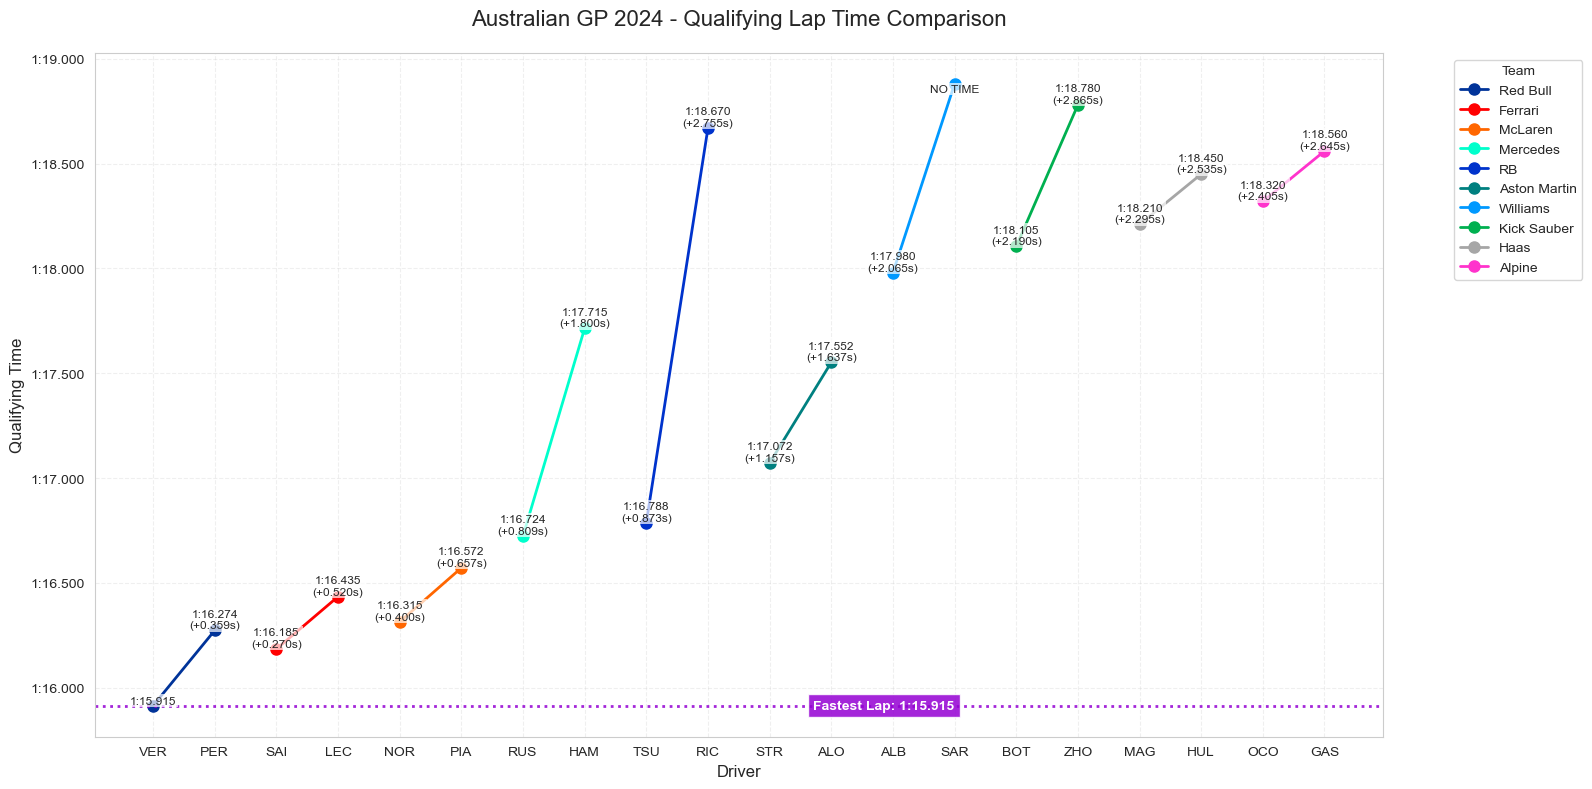

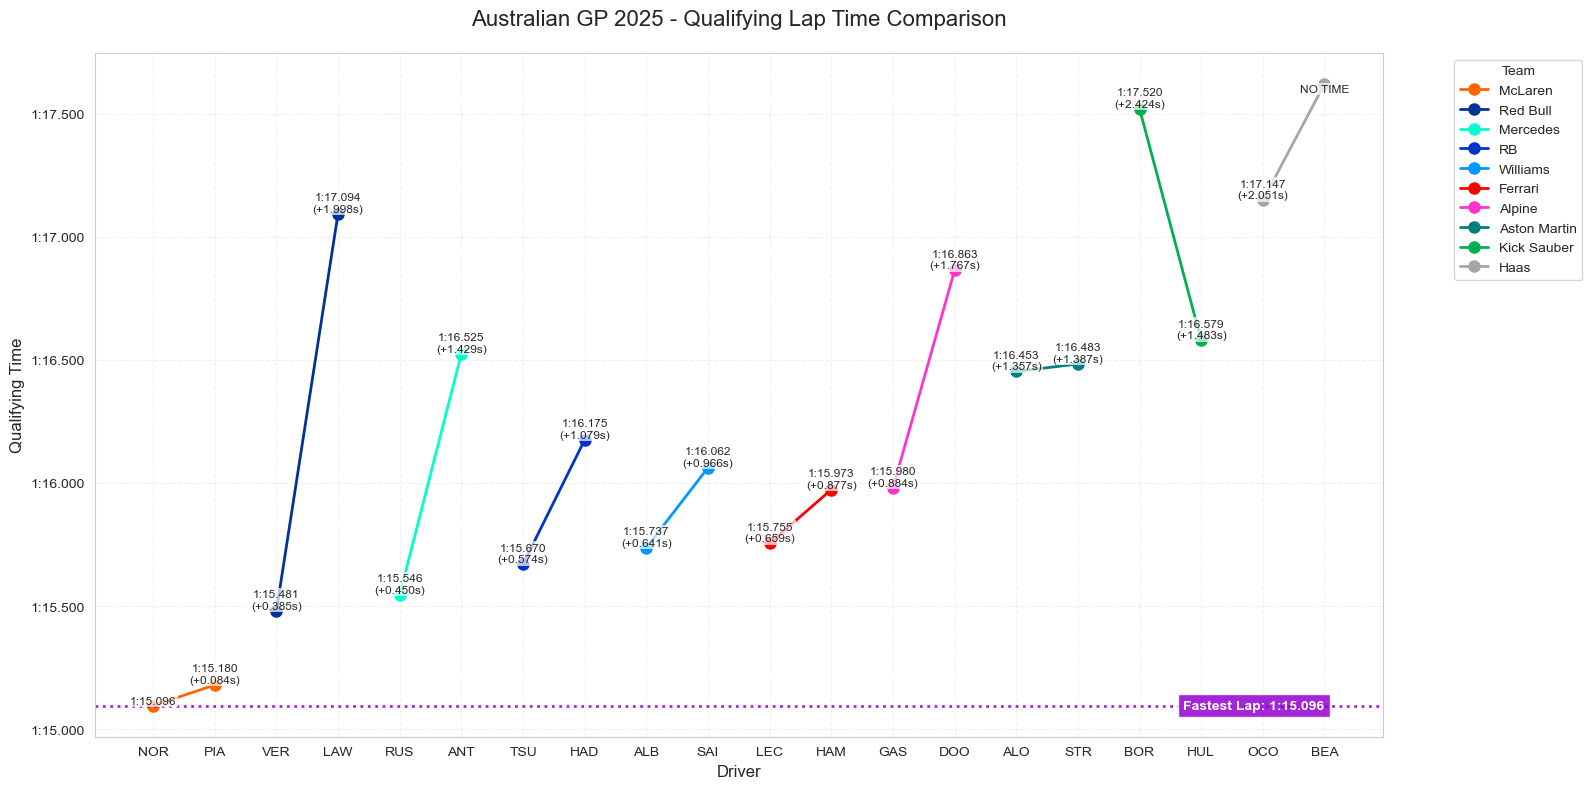

In [ ]:
#=======================================================================================================================
                                      #AUSTRALIA 2024
#=======================================================================================================================



# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Australian GP": {
            "DRIVER": ["VER", "SAI", "NOR", "LEC", "PIA",
                       "PER", "RUS", "TSU", "STR", "ALO",  
                        "HAM", "ALB", "BOT", "MAG", "OCO",  
                        "HUL", "GAS", "RIC", "ZHO", "SAR"],
            
            "TEAM": ["Red Bull", "Ferrari", "McLaren", "Ferrari", "McLaren",
                     "Red Bull", "Mercedes","RB", "Aston Martin", "Aston Martin", 
                       "Mercedes", "Williams", "Kick Sauber", "Haas", "Alpine",
                      "Haas", "Alpine", "RB",  "Kick Sauber", "Williams",],
            
            "Q_TIME": ["1:15.915", "1:16.185", "1:16.315", "1:16.435", "1:16.572",
                       "1:16.274", "1:16.724", "1:16.788", "1:17.072", "1:17.552",
                        "1:17.715", "1:17.980", "1:18.105", "1:18.210", "1:18.320",
                        "1:18.450", "1:18.560", "1:18.670", "1:18.780", "NO TIME"]
                       
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()  #TO DROP NULL VALUES.
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df   

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2024 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


sns.set_style("whitegrid")  # clean background
sns.set_palette("Set2")     # soft, modern colors

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Australian GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)




#=======================================================================================================================
                                      #AUSTRALIA 2025
#=======================================================================================================================

# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Australian GP": {
            "DRIVER": [ "NOR", "PIA", "VER", "RUS", "TSU",
                        "ALB", "LEC", "HAM", "GAS", "SAI",
                        "HAD", "ALO", "STR", "DOO", "BOR",
                         "ANT", "HUL", "LAW", "OCO", "BEA",     
                       ],
            
            "TEAM": [  "McLaren", "McLaren", "Red Bull", "Mercedes", "RB",
                        "Williams", "Ferrari", "Ferrari", "Alpine", "Williams",
                        "RB", "Aston Martin", "Aston Martin", "Alpine", "Kick Sauber",
                        "Mercedes", "Kick Sauber", "Red Bull", "Haas", "Haas",
                     ],
            
            "Q_TIME": ["1:15.096", "1:15.180", "1:15.481", "1:15.546", "1:15.670", "1:15.737", 
                       "1:15.755", "1:15.973", "1:15.980", "1:16.062", "1:16.175", "1:16.453", 
                       "1:16.483", "1:16.863", "1:17.520", "1:16.525", "1:16.579", "1:17.094", 
                       "1:17.147", "NO TIME"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2025 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Australian GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)


## Chinese Grand Prix – Qualifying Analysis: 2024 vs 2025

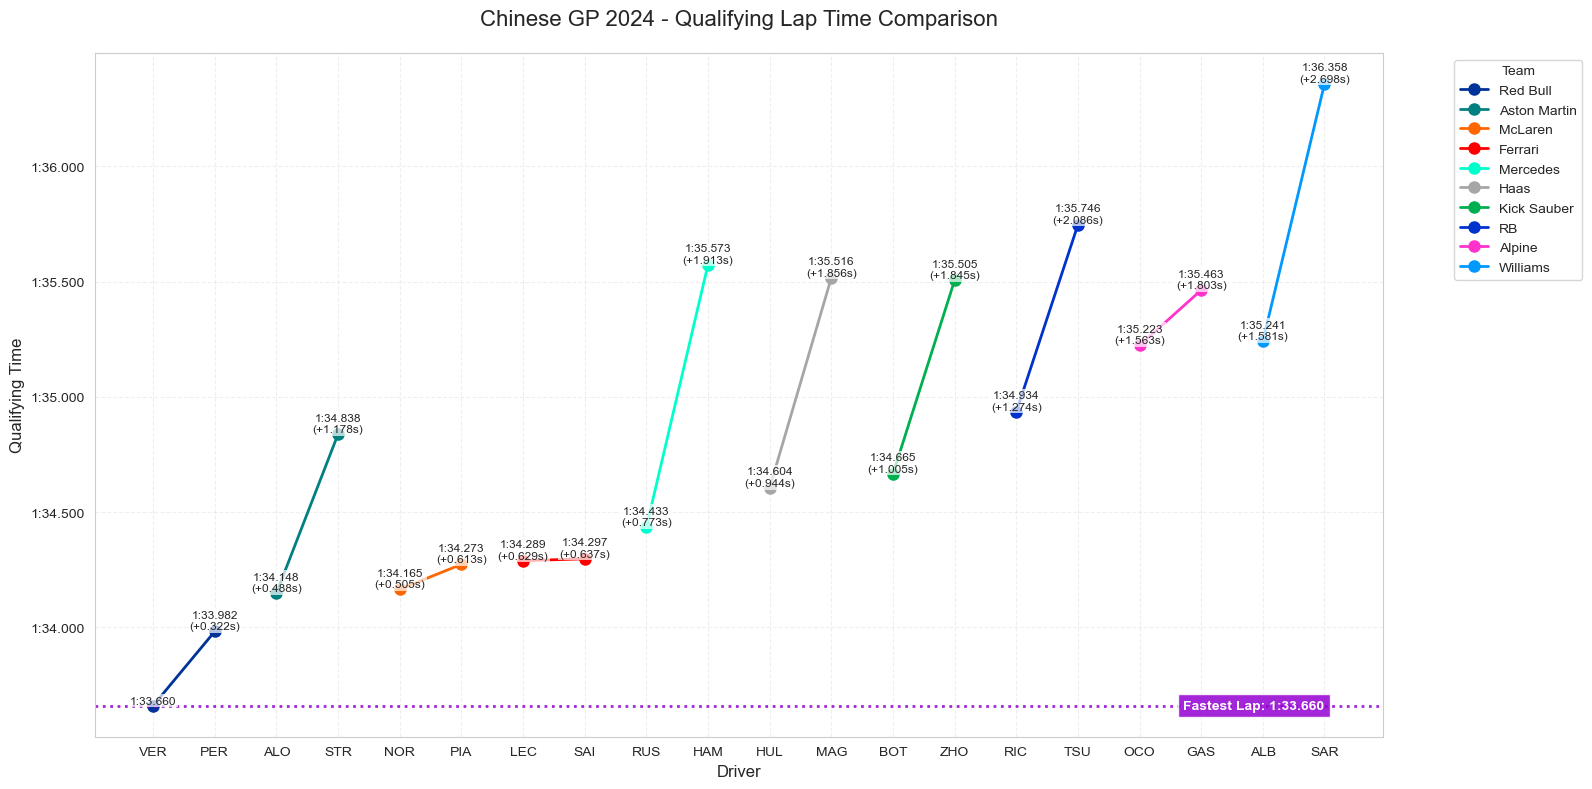

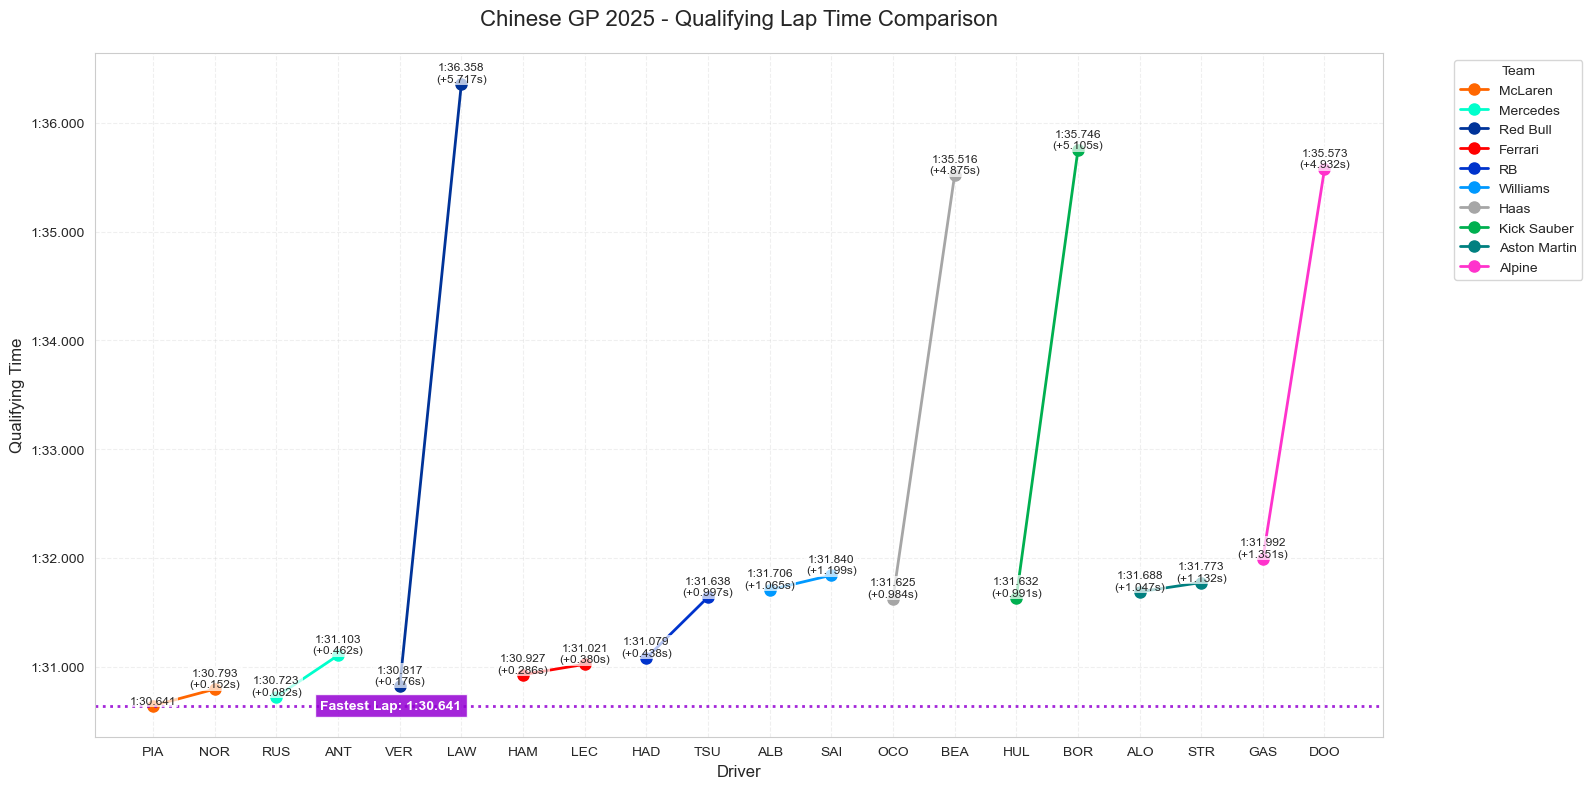

In [ ]:
#=======================================================================================================================
                                      #CHINESE 2024
#=======================================================================================================================



# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Chinese GP": {
            "DRIVER": ["VER", "PER", "ALO", "NOR", "PIA",  "LEC", "SAI", "RUS", "HUL",    
                        "BOT", "STR", "RIC", "OCO", "ALB", "GAS", "ZHO", "MAG", "HAM",      
                          "TSU", "SAR"],
            
            "TEAM": ["Red Bull", "Red Bull",  "Aston Martin", "McLaren", "McLaren", "Ferrari", "Ferrari", "Mercedes", "Haas",    
                     "Kick Sauber", "Aston Martin", "RB", "Alpine", "Williams", "Alpine", "Kick Sauber", "Haas", "Mercedes",       
                      "RB", "Williams" ],
            
            "Q_TIME": ["1:33.660", "1:33.982", "1:34.148", "1:34.165", "1:34.273", "1:34.289", 
                       "1:34.297", "1:34.433", "1:34.604", "1:34.665", "1:34.838", "1:34.934", 
                       "1:35.223", "1:35.241", "1:35.463", "1:35.505", "1:35.516", "1:35.573", 
                       "1:35.746", "1:36.358"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2024 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================
 
GRAND_PRIX = "Chinese GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)




#=======================================================================================================================
                                      #CHINESE 2025
#=======================================================================================================================




# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Chinese GP": {
            "DRIVER": [ "PIA", "RUS", "NOR", "VER", "HAM",
                       "LEC", "HAD", "ANT", "TSU", "ALB",
                       "OCO", "HUL", "ALO", "STR", "SAI",
                       "GAS", "BEA", "DOO", "BOR", "LAW",         
                     ],
            
            "TEAM": [  "McLaren", "Mercedes", "McLaren", "Red Bull", "Ferrari",
                        "Ferrari", "RB", "Mercedes", "RB", "Williams",
                         "Haas", "Kick Sauber", "Aston Martin", "Aston Martin", "Williams",
                         "Alpine", "Haas", "Alpine", "Kick Sauber", "Red Bull",
                        ],
            
            "Q_TIME": ["1:30.641", "1:30.723", "1:30.793", "1:30.817", "1:30.927", "1:31.021", 
                       "1:31.079", "1:31.103", "1:31.638", "1:31.706", "1:31.625", "1:31.632", 
                       "1:31.688", "1:31.773", "1:31.840", "1:31.992", "1:35.516", "1:35.573", 
                       "1:35.746", "1:36.358"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2025 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================
 
GRAND_PRIX = "Chinese GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)


## Japanese Grand Prix – Qualifying Analysis: 2024 vs 2025

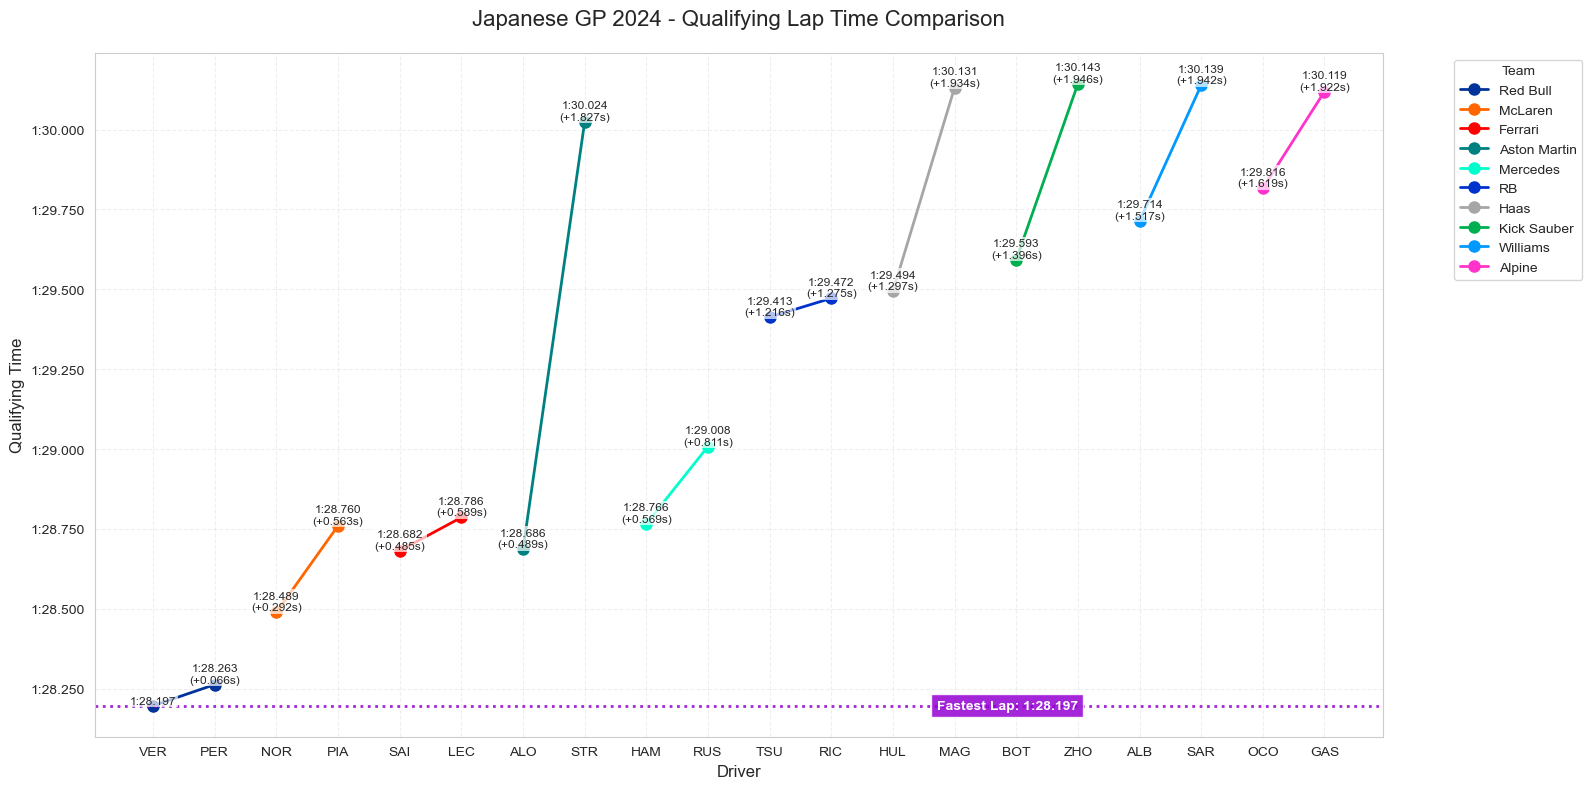

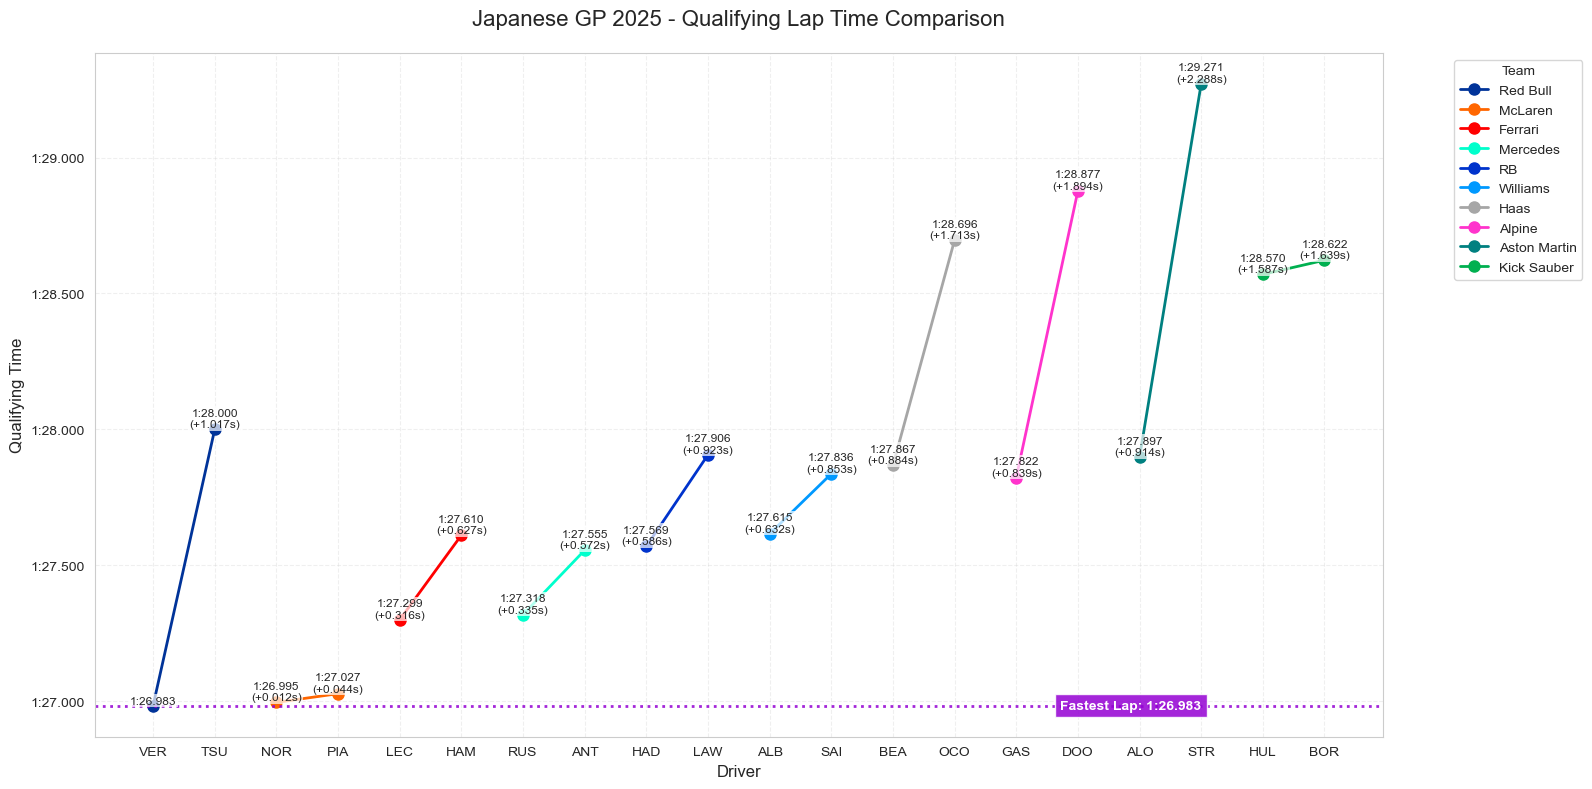

In [ ]:
#=======================================================================================================================
                                      #JAPANESE 2024
#=======================================================================================================================
# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Japanese GP": {
            "DRIVER": ["VER", "PER", "NOR", "SAI", "ALO", "PIA", "HAM", "LEC", "RUS",    
                       "TSU", "RIC", "HUL", "BOT", "ALB", "OCO", "STR", "GAS", "MAG",    
                            "SAR", "ZHO"],
            
            "TEAM": ["Red Bull", "Red Bull", "McLaren", "Ferrari", "Aston Martin", "McLaren", "Mercedes", "Ferrari",    
                      "Mercedes", "RB", "RB", "Haas", "Kick Sauber", "Williams", "Alpine", "Aston Martin", "Alpine",
                      "Haas", "Williams", "Kick Sauber"],
            
            "Q_TIME": ["1:28.197", "1:28.263", "1:28.489", "1:28.682", "1:28.686", "1:28.760", 
                       "1:28.766", "1:28.786", "1:29.008", "1:29.413", "1:29.472", "1:29.494", 
                       "1:29.593", "1:29.714", "1:29.816", "1:30.024", "1:30.119", "1:30.131", 
                       "1:30.139", "1:30.143"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2024 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Japanese GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)

#=======================================================================================================================
                                      #JAPANESE 2025
#=======================================================================================================================


# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Japanese GP": {
            "DRIVER": [ "VER", "NOR", "PIA", "LEC", "RUS",
                        "ANT", "HAD", "HAM", "ALB", "BEA",
                         "GAS", "ALO", "LAW", "TSU", "SAI",
                         "HUL", "BOR", "OCO", "DOO", "STR",         
                       ],
            
            "TEAM": [  "Red Bull", "McLaren", "McLaren", "Ferrari", "Mercedes",
                        "Mercedes", "RB", "Ferrari", "Williams", "Haas",
                        "Alpine", "Aston Martin", "RB", "Red Bull", "Williams",
                         "Kick Sauber", "Kick Sauber", "Haas", "Alpine", "Aston Martin",       
                     ],
            
            "Q_TIME": ["1:26.983", "1:26.995", "1:27.027", "1:27.299", "1:27.318", "1:27.555", 
                       "1:27.569", "1:27.610", "1:27.615", "1:27.867", "1:27.822", "1:27.897", 
                       "1:27.906", "1:28.000", "1:27.836", "1:28.570", "1:28.622", "1:28.696", 
                       "1:28.877", "1:29.271"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2025 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Japanese GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)


## Bahrain Grand Prix – Qualifying Analysis: 2024 vs 2025

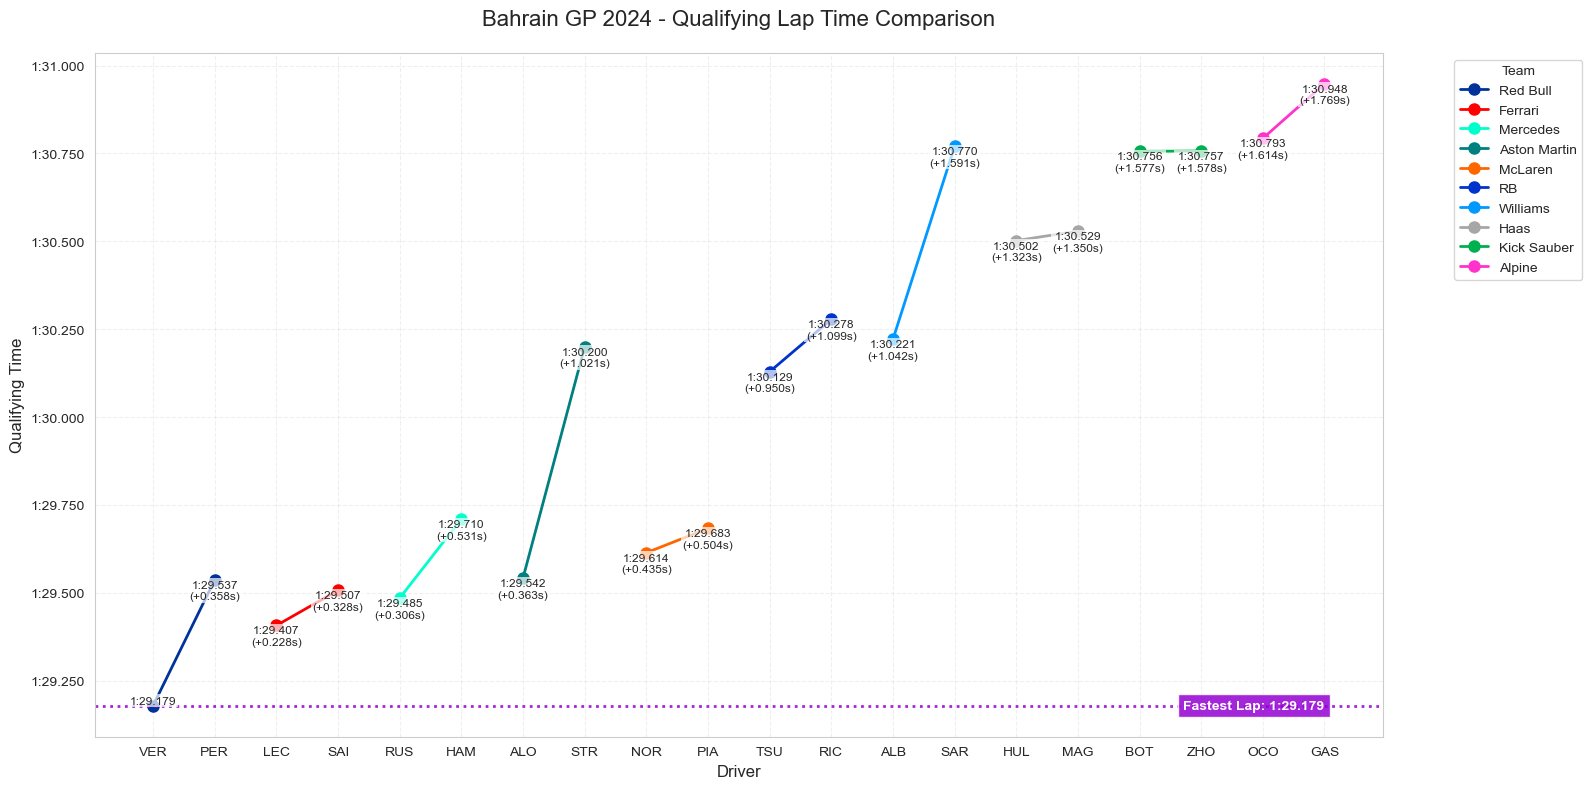

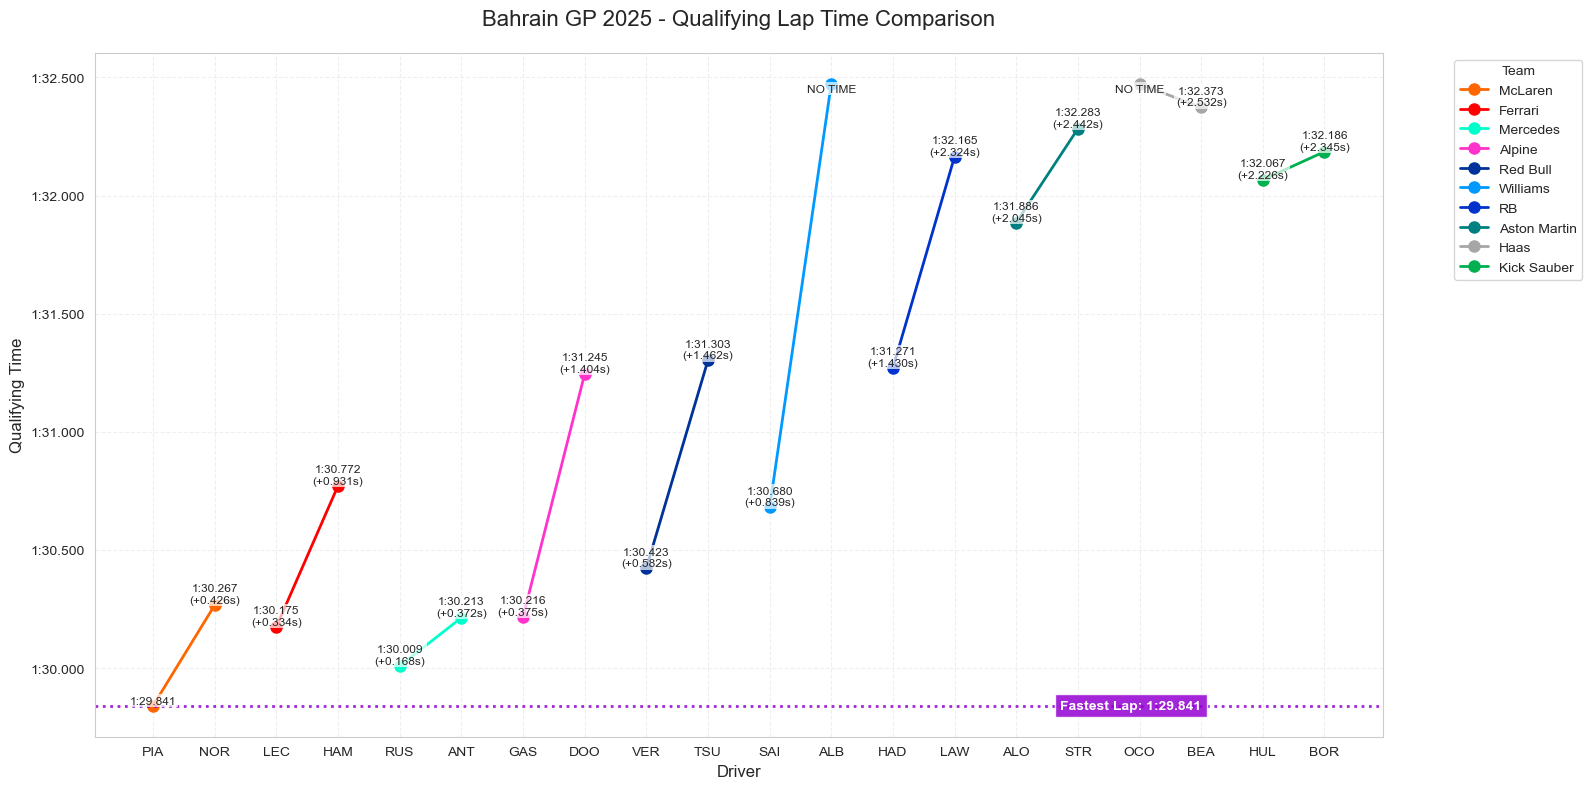

In [ ]:
#=======================================================================================================================
                                      #BAHRAIN 2024
#=======================================================================================================================

# ======================
# 1. DATA PREPARATION
# ======================

# Sample dataset (replace with your actual data loading)
# Columns needed: DRIVER, TEAM, Q_TIME (format "1:29.179")
def load_qualifying_data(grand_prix):
    """Simulated data loader - replace with your real data source"""
    sample_data = {
        "Bahrain GP": {
            "DRIVER": ["VER", "PER", "LEC", "SAI", "RUS", "HAM", "NOR", "PIA", 
                      "ALO", "STR", "GAS", "OCO", "TSU", "RIC", "BOT", "ZHO", 
                      "MAG", "HUL", "ALB", "SAR"],
            "TEAM": ["Red Bull"]*2 + ["Ferrari"]*2 + ["Mercedes"]*2 + ["McLaren"]*2 + 
                   ["Aston Martin"]*2 + ["Alpine"]*2 + ["RB"]*2 + ["Kick Sauber"]*2 + 
                   ["Haas"]*2 + ["Williams"]*2,
            "Q_TIME": ["1:29.179", "1:29.537", "1:29.407", "1:29.507", "1:29.485", 
                      "1:29.710", "1:29.614", "1:29.683", "1:29.542", "1:30.200",
                      "1:30.948", "1:30.793", "1:30.129", "1:30.278", "1:30.756",
                      "1:30.757", "1:30.529", "1:30.502", "1:30.221", "1:30.770"]
        },
        "Saudi Arabia GP": {
            # Add other races similarly...
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    """Convert times to seconds and calculate gaps"""
    # Convert lap time strings to seconds
    df["TIME_SEC"] = df["Q_TIME"].apply(lambda x: int(x.split(":")[0])*60 + float(x.split(":")[1]))
    
    # Sort by fastest time
    df = df.sort_values("TIME_SEC").reset_index(drop=True)
    
    # Calculate gap to fastest
    fastest_time = df["TIME_SEC"].min()
    df["GAP"] = df["TIME_SEC"] - fastest_time
    
    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    """Generate the comparison plot"""
    # Set up team colors (official F1 team colors)
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }
    
    plt.figure(figsize=(16, 8))
    
    # Plot each team's drivers
    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=team_colors[team],
            label=team,
            linewidth=2,
            markersize=8
        )
    
    # Annotate each driver's time
    for _, row in df.iterrows():
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row['Q_TIME'],
            ha="center",
            va="bottom" if row["GAP"] == 0 else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )
    
    # Format y-axis as minutes:seconds using FuncFormatter
    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))
    
    # Customize plot
    plt.title(f"{grand_prix} 2024 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    # Highlight fastest lap
    fastest_time = df["TIME_SEC"].min()
    plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
    plt.text(
        df["DRIVER"].iloc[-1],
        fastest_time,
        f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
        ha="right",
        va="center",
        color="white",
        fontweight="bold",
        bbox=dict(facecolor="darkviolet", alpha=0.85)
    )
    

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

# User input: Change this to any Grand Prix name
GRAND_PRIX = "Bahrain GP"  # Try "Saudi Arabia GP", "Monaco GP", etc.

# Load and process data
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)

# Generate the plot
plot_qualifying_comparison(processed_data, GRAND_PRIX)



#=======================================================================================================================
                                      #BAHRAIN 2025
#=======================================================================================================================

# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
       
"Bahrain GP": {
            "DRIVER": [ "PIA", "LEC", "RUS", "GAS", "ANT",
                        "NOR", "VER", "SAI", "HAM", "TSU",
                        "DOO", "HAD", "ALO", "OCO", "ALB",
                        "HUL", "LAW", "BOR", "STR", "BEA",   
                         ],
            
            "TEAM": [  "McLaren", "Ferrari", "Mercedes", "Alpine", "Mercedes",
                       "McLaren", "Red Bull", "Williams", "Ferrari", "Red Bull",
                        "Alpine", "RB", "Aston Martin", "Haas", "Williams",
                         "Kick Sauber", "RB", "Kick Sauber", "Aston Martin", "Haas",
                    ],
            
            "Q_TIME": ["1:29.841", "1:30.175", "1:30.009", "1:30.216", "1:30.213", 
                      "1:30.267", "1:30.423", "1:30.680", "1:30.772", "1:31.303",
                      "1:31.245", "1:31.271", "1:31.886", "NO TIME", "NO TIME",
                      "1:32.067", "1:32.165", "1:32.186", "1:32.283", "1:32.373"]
        },
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2025 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Bahrain GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)




## Saudi Arabia Grand Prix – Qualifying Analysis: 2024 vs 2025

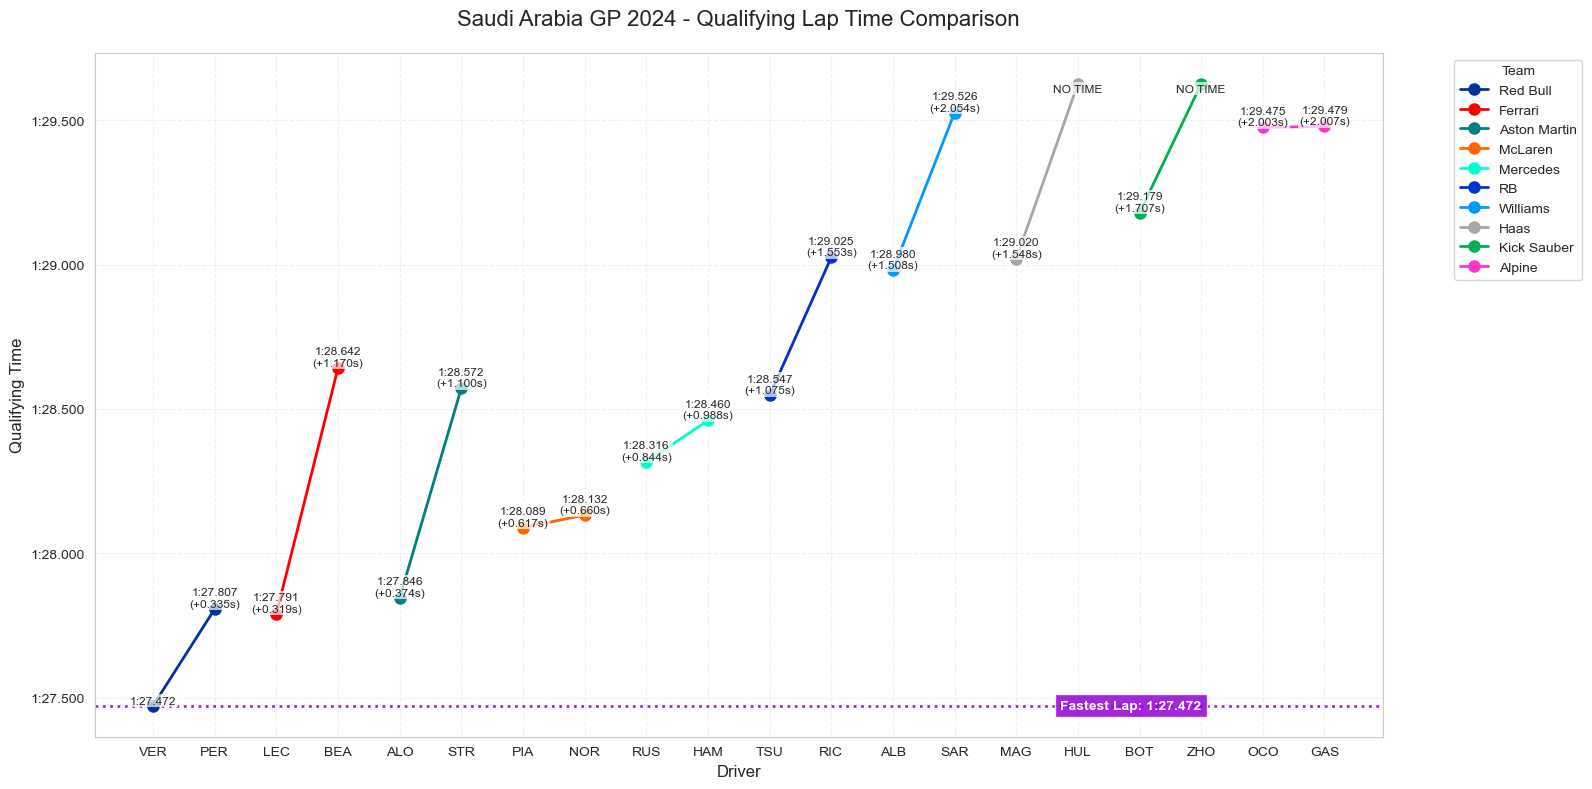

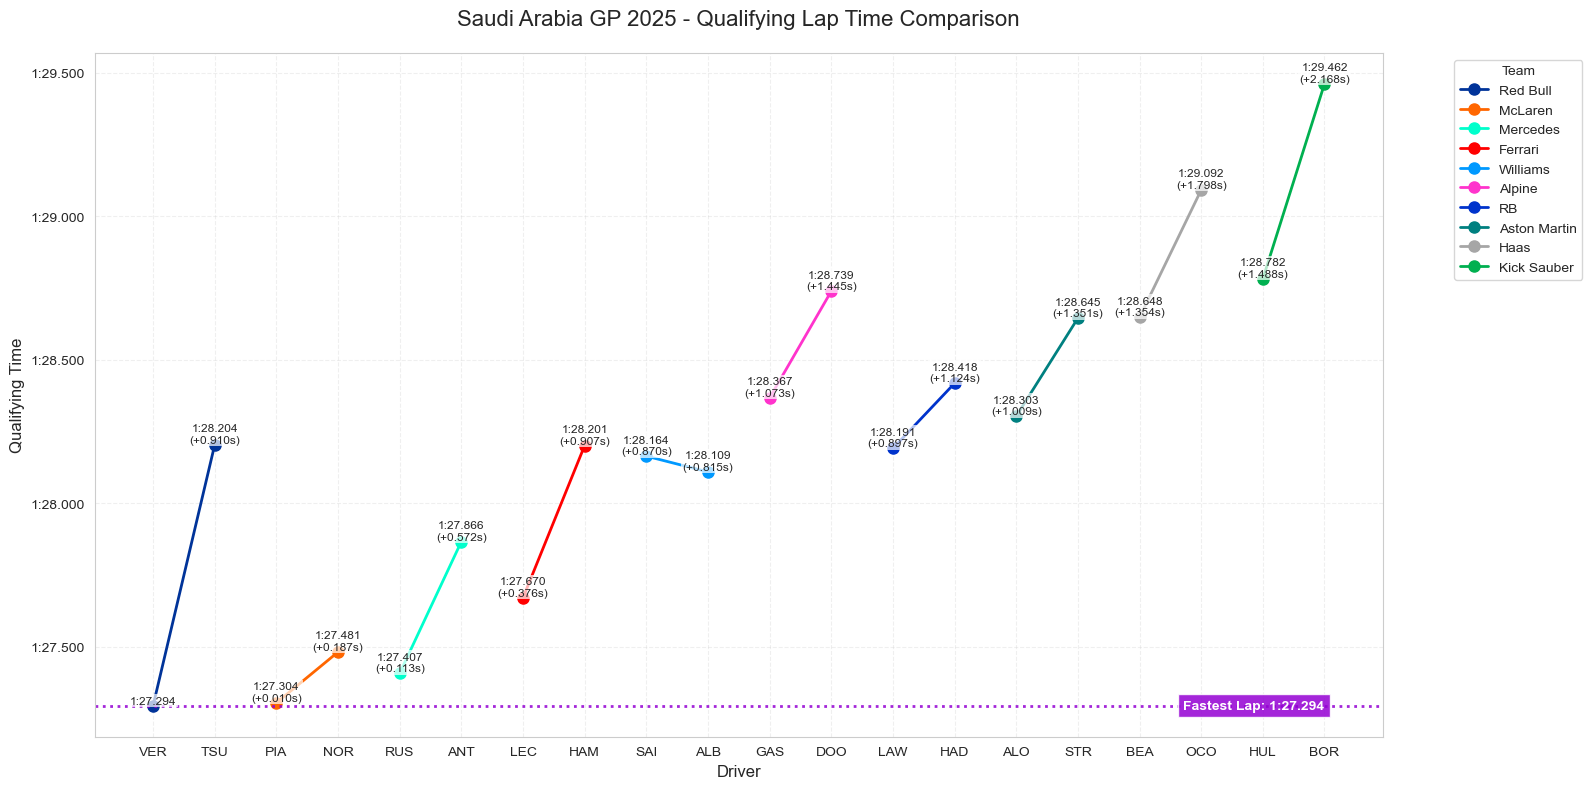

In [ ]:
#=======================================================================================================================
                                      #SAUDI ARABIA 2024
#=======================================================================================================================
# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Saudi Arabia GP": {
            "DRIVER": ["VER", "LEC", "PER", "ALO", "PIA", "NOR", "RUS", "HAM", 
                       "TSU", "STR", "BEA", "ALB", "MAG", "RIC", "HUL", "BOT", 
                       "OCO", "GAS", "SAR", "ZHO"],
            
            "TEAM": ["Red Bull", "Ferrari", "Red Bull", "Aston Martin", "McLaren", "McLaren", 
                     "Mercedes", "Mercedes", "RB", "Aston Martin", "Ferrari", "Williams", 
                     "Haas", "RB", "Haas", "Kick Sauber", "Alpine", "Alpine", "Williams", "Kick Sauber"],
            
            "Q_TIME": ["1:27.472", "1:27.791", "1:27.807", "1:27.846", "1:28.089", "1:28.132", 
                       "1:28.316", "1:28.460", "1:28.547", "1:28.572", "1:28.642", "1:28.980", 
                       "1:29.020", "1:29.025", "NO TIME", "1:29.179", "1:29.475", "1:29.479", 
                       "1:29.526", "NO TIME"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2024 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Saudi Arabia GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)



#=======================================================================================================================
                                      #SAUDI ARABIA 2025
#=======================================================================================================================




# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Saudi Arabia GP": {
            "DRIVER": [ "VER", "PIA", "RUS", "LEC", "ANT",  
                        "SAI", "HAM", "TSU", "GAS", "NOR", 
                        "ALB", "LAW", "ALO", "HAD", "BEA",  
                        "STR", "DOO", "HUL", "OCO", "BOR",      
                          ],
            
            "TEAM": [  "Red Bull", "McLaren", "Mercedes", "Ferrari", "Mercedes", 
                       "Williams", "Ferrari", "Red Bull", "Alpine", "McLaren",
                      "Williams", "RB", "Aston Martin", "RB", "Haas", 
                     "Aston Martin",  "Alpine", "Kick Sauber", "Haas", "Kick Sauber"  
                     ],
            
            "Q_TIME": ["1:27.294", "1:27.304", "1:27.407", "1:27.670", "1:27.866", 
                      "1:28.164", "1:28.201", "1:28.204", "1:28.367", "1:27.481",
                      "1:28.109", "1:28.191", "1:28.303", "1:28.418", "1:28.648",
                      "1:28.645", "1:28.739", "1:28.782", "1:29.092", "1:29.462"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2025 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Saudi Arabia GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)


## Miami Grand Prix – Qualifying Analysis: 2024 vs 2025

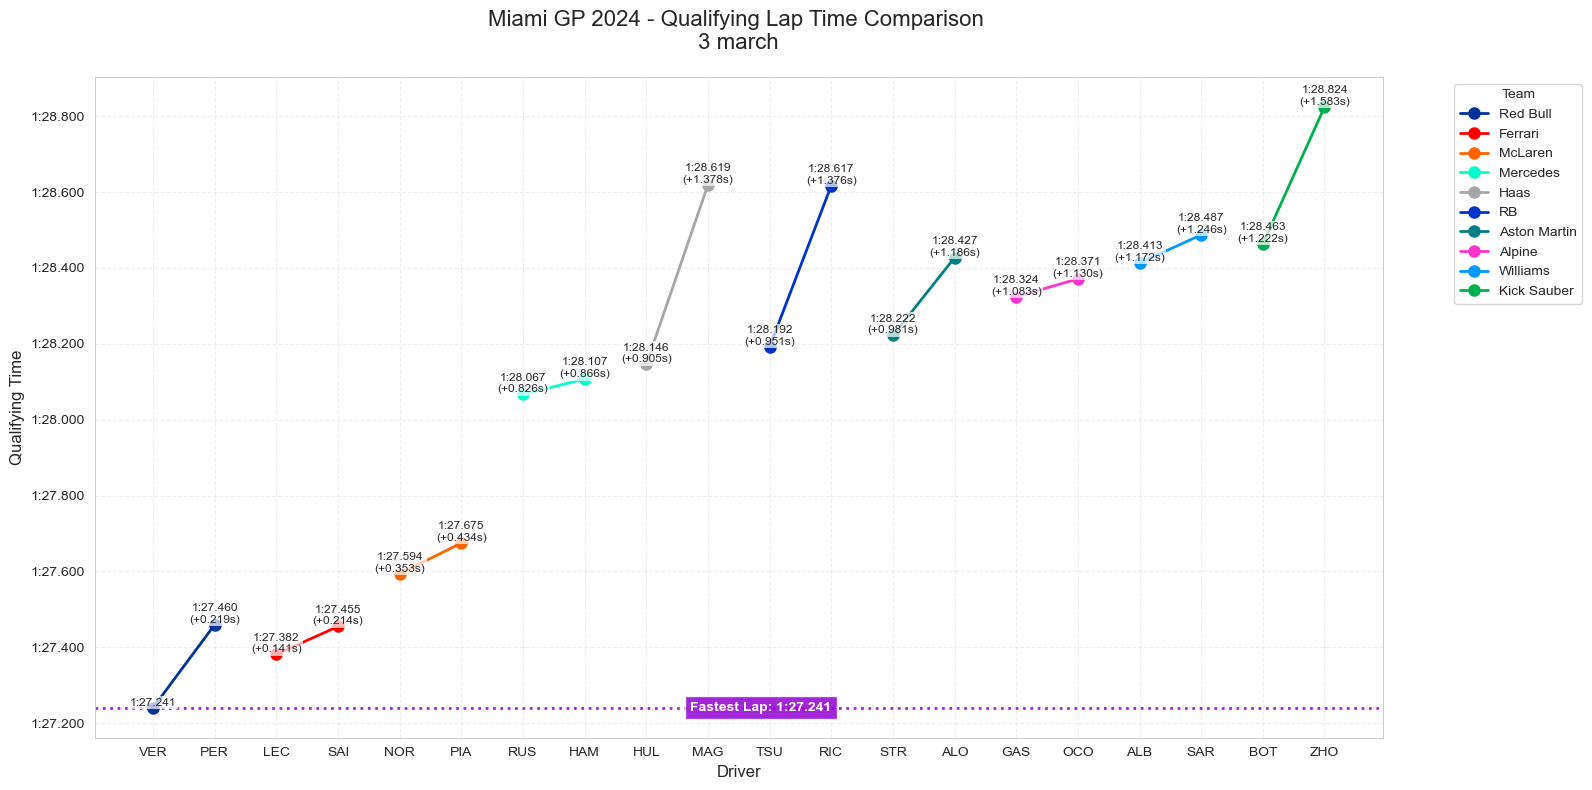

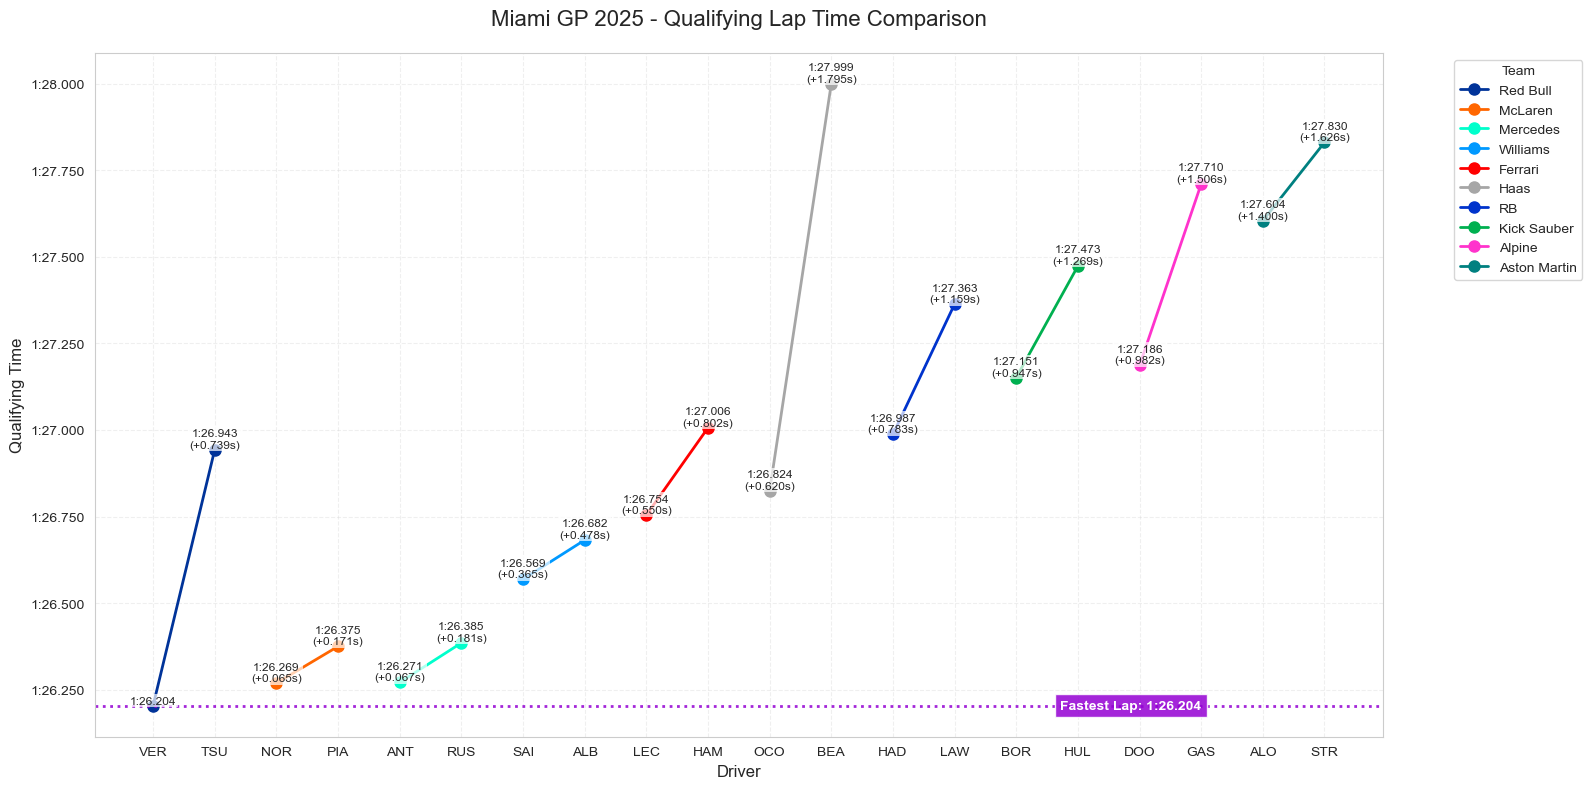

In [ ]:
#=======================================================================================================================
                                      #MIAMI 2024
#=======================================================================================================================
# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Miami GP": {
            "DRIVER": [ "VER", "LEC", "SAI",  "PER", "NOR",  
                        "PIA", "RUS", "HAM", "HUL", "TSU",   
                        "STR", "GAS", "OCO", "ALB", "ALO",    
                        "BOT", "SAR", "MAG", "ZHO", "RIC",     
                          ],
            
            "TEAM": [  "Red Bull", "Ferrari", "Ferrari", "Red Bull", "McLaren",  
                       "McLaren", "Mercedes", "Mercedes", "Haas", "RB",    
                      "Aston Martin", "Alpine", "Alpine", "Williams", "Aston Martin",   
                        "Kick Sauber", "Williams", "Haas", "Kick Sauber", "RB",  
                     ],
            
            "Q_TIME": ["1:27.241", "1:27.382", "1:27.455", "1:27.460", "1:27.594", 
                      "1:27.675", "1:28.067", "1:28.107", "1:28.146", "1:28.192",
                      "1:28.222", "1:28.324", "1:28.371", "1:28.413", "1:28.427",
                      "1:28.463", "1:28.487", "1:28.619", "1:28.824", "1:28.617"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2024 - Qualifying Lap Time Comparison \n 3 march ", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Miami GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)



#=======================================================================================================================
                                      #MIAMI 2025
#=======================================================================================================================




# ======================
# 1. DATA PREPARATION
# ======================

def load_qualifying_data(grand_prix):
    sample_data = {
        "Miami GP": {
            "DRIVER": [ "VER", "NOR", "ANT", "PIA", "RUS",    
                        "SAI", "ALB", "LEC", "OCO",  "TSU",   
                        "HAD", "HAM", "BOR", "DOO", "LAW",      
                        "HUL", "ALO", "STR", "BEA", "GAS",     
                          ],
            
            "TEAM": [  "Red Bull", "McLaren", "Mercedes", "McLaren", "Mercedes", 
                       "Williams", "Williams", "Ferrari", "Haas", "Red Bull",  
                      "RB", "Ferrari", "Kick Sauber", "Alpine", "RB",    
                     "Kick Sauber", "Aston Martin", "Aston Martin", "Haas", "Alpine",      
                     ],
            
            "Q_TIME": ["1:26.204", "1:26.269", "1:26.271", "1:26.375", "1:26.385", 
                      "1:26.569", "1:26.682", "1:26.754", "1:26.824", "1:26.943",
                      "1:26.987", "1:27.006", "1:27.151", "1:27.186", "1:27.363",
                      "1:27.473", "1:27.604", "1:27.830", "1:27.999", "1:27.710"]
        }
    }
    return pd.DataFrame(sample_data[grand_prix])

# ======================
# 2. DATA PROCESSING
# ======================

def preprocess_data(df):
    def convert_time_to_sec(x):
        if isinstance(x, str) and ":" in x:
            try:
                m, s = x.split(":")
                return int(m) * 60 + float(s)
            except:
                return None
        return None

    df["TIME_SEC"] = df["Q_TIME"].apply(convert_time_to_sec)
    valid_times = df["TIME_SEC"].dropna()
    slowest_valid = valid_times.max() if not valid_times.empty else 90.0

    # Assign NO TIME drivers the slowest valid time
    df["IS_NO_TIME"] = df["Q_TIME"] == "NO TIME"
    df.loc[df["IS_NO_TIME"], "TIME_SEC"] = slowest_valid + 0.1

    # Calculate GAP only for real lap times
    fastest_time = valid_times.min() if not valid_times.empty else None
    df["GAP"] = df["TIME_SEC"] - fastest_time if fastest_time else None

    return df

# ======================
# 3. VISUALIZATION
# ======================

def plot_qualifying_comparison(df, grand_prix):
    team_colors = {
        "Red Bull": "#003399",
        "Ferrari": "#FF0000",
        "Mercedes": "#00FFCC",
        "McLaren": "#FF6600",
        "Aston Martin": "#008080",
        "Alpine": "#FF33CC",
        "RB": "#0033CC",
        "Kick Sauber": "#00B050",
        "Haas": "#A6A6A6",
        "Williams": "#0099FF"
    }

    plt.figure(figsize=(16, 8))

    for team in df["TEAM"].unique():
        team_data = df[df["TEAM"] == team]
        color = team_colors.get(team, "gray")
        
        plt.plot(
            team_data["DRIVER"],
            team_data["TIME_SEC"],
            marker="o",
            linestyle="-",
            color=color,
            label=team,
            linewidth=2,
            markersize=8,
            
        )

    for _, row in df.iterrows():
        label = "NO TIME" if row["IS_NO_TIME"] else (
            f"{row['Q_TIME']}\n(+{row['GAP']:.3f}s)" if row["GAP"] > 0 else row["Q_TIME"]
        )
        plt.text(
            row["DRIVER"],
            row["TIME_SEC"],
            label,
            ha="center",
            va="bottom" if not row["IS_NO_TIME"] else "top",
            fontsize=8.6,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
        )

    def sec_to_time_format(x, pos):
        m = int(x // 60)
        s = x % 60
        return f"{m}:{s:06.3f}"

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(sec_to_time_format))

    plt.title(f"{grand_prix} 2025 - Qualifying Lap Time Comparison", fontsize=16, pad=20)
    plt.xlabel("Driver", fontsize=12)
    plt.ylabel("Qualifying Time", fontsize=12)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

    if fastest_time := df[~df["IS_NO_TIME"]]["TIME_SEC"].min():
        plt.axhline(y=fastest_time, color="darkviolet", linestyle=":", linewidth=2, alpha=0.85)
        plt.text(
            df["DRIVER"].iloc[-1],
            fastest_time,
            f"Fastest Lap: {int(fastest_time // 60)}:{fastest_time % 60:06.3f}",
            ha="right",
            va="center",
            color="white",
            fontweight="bold",
            bbox=dict(facecolor="darkviolet", alpha=0.85)
        )

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ======================
# 4. EXECUTION
# ======================

GRAND_PRIX = "Miami GP"
qualifying_data = load_qualifying_data(GRAND_PRIX)
processed_data = preprocess_data(qualifying_data)
plot_qualifying_comparison(processed_data, GRAND_PRIX)
